In [2]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)


2.12.0
2.12.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Initialize ImageDataGenerator without a fixed target_size
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = datagen.flow_from_directory(
    'animal_database/',  # Specify the path to your main dataset
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Set as training data
    shuffle=True,
    seed=42
)

validation_generator = datagen.flow_from_directory(
    'animal_database/',  # Specify the path to your main dataset
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Set as validation data
    shuffle=True,
    seed=42
)

class_indices = train_generator.class_indices
print(class_indices)


Found 1016 images belonging to 10 classes.
Found 432 images belonging to 10 classes.
{'bear': 0, 'cougar': 1, 'cow': 2, 'coyote': 3, 'deer': 4, 'elephant': 5, 'giraffe': 6, 'goat': 7, 'gorilla': 8, 'horse': 9}


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Adjust the model to use a global average pooling layer instead of Flatten
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(None, None, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Global pooling and dense layers
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Assuming you're using 'train_generator' from a previous example
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train 
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)


Epoch 1/50


2024-03-11 18:11:50.700969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-03-11 18:11:50.704500: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


31/31 [==============================] - ETA: 0s - loss: 2.9040 - accuracy: 0.1819

2024-03-11 18:12:31.523911: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


31/31 [==============================] - 45s 1s/step - loss: 2.9040 - accuracy: 0.1819 - val_loss: 2.2917 - val_accuracy: 0.1130
Epoch 2/50
31/31 [==============================] - 38s 1s/step - loss: 2.5064 - accuracy: 0.2571 - val_loss: 2.3480 - val_accuracy: 0.1130
Epoch 3/50
31/31 [==============================] - 38s 1s/step - loss: 2.3374 - accuracy: 0.2876 - val_loss: 2.4587 - val_accuracy: 0.0817
Epoch 4/50
31/31 [==============================] - 38s 1s/step - loss: 2.1311 - accuracy: 0.3384 - val_loss: 2.5143 - val_accuracy: 0.1106
Epoch 5/50
31/31 [==============================] - 38s 1s/step - loss: 2.0559 - accuracy: 0.3537 - val_loss: 2.4770 - val_accuracy: 0.1202
Epoch 6/50
31/31 [==============================] - 38s 1s/step - loss: 1.9090 - accuracy: 0.3953 - val_loss: 2.5787 - val_accuracy: 0.1106
Epoch 7/50
31/31 [==============================] - 38s 1s/step - loss: 1.9271 - accuracy: 0.3770 - val_loss: 3.0022 - val_accuracy: 0.1010
Epoch 8/50
31/31 [=============

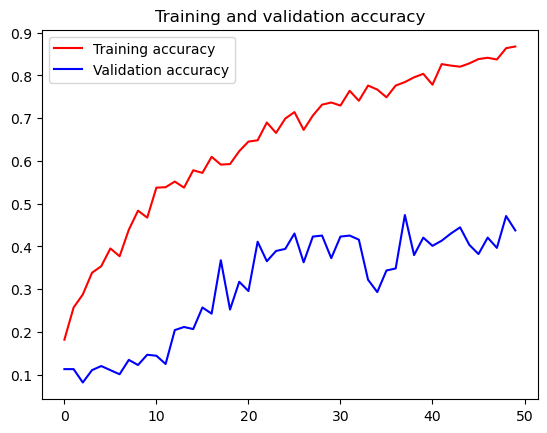

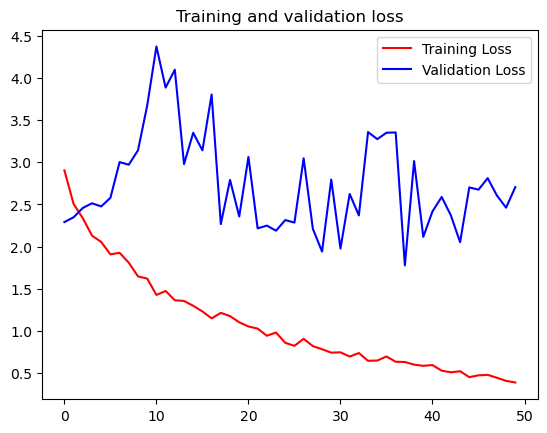

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [7]:
model.save('animals')

2024-03-11 18:42:17.199024: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,32]
	 [[{{node inputs}}]]
2024-03-11 18:42:17.205491: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,64]
	 [[{{node inputs}}]]
2024-03-11 18:42:17.211766: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,?,128]
	 [[{{node inputs}}]]
2024-0

INFO:tensorflow:Assets written to: animals/assets


INFO:tensorflow:Assets written to: animals/assets
